# РТ5-61Б, Забурунов Л. В.

# Технологии Машинного Обучения

# Лабораторная Работа №2

## "Обработка пропусков в данных. Кодирование категориальных признаков. Масштабирование данных"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


lab2_data = pd.read_csv("ML_Datasets/Lab2/train-data.csv")

### 1. Исследование структуры данных

In [2]:
lab2_data.shape

(6019, 14)

In [3]:
lab2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
## Исследуем структуру набора данных
def PrintDatasetInfo(dataframe):
    index = 0
    for column in dataframe.columns:
        column_name = column
        column_type = str(dataframe[column].dtypes)
        column_values = "(continuous)" if column_type == "float64" else dataframe[column].unique()
        column_nulls = dataframe[dataframe[column].isnull()].shape[0]
        print("\nСтолбец {0} (тип {1}) имеет {2} пропусков (индекс {3})".format(column_name, column_type, column_nulls, index, column_values))
        index = index + 1
        
PrintDatasetInfo(lab2_data)


Столбец Unnamed: 0 (тип int64) имеет 0 пропусков (индекс 0)

Столбец Name (тип object) имеет 0 пропусков (индекс 1)

Столбец Location (тип object) имеет 0 пропусков (индекс 2)

Столбец Year (тип int64) имеет 0 пропусков (индекс 3)

Столбец Kilometers_Driven (тип int64) имеет 0 пропусков (индекс 4)

Столбец Fuel_Type (тип object) имеет 0 пропусков (индекс 5)

Столбец Transmission (тип object) имеет 0 пропусков (индекс 6)

Столбец Owner_Type (тип object) имеет 0 пропусков (индекс 7)

Столбец Mileage (тип object) имеет 2 пропусков (индекс 8)

Столбец Engine (тип object) имеет 36 пропусков (индекс 9)

Столбец Power (тип object) имеет 36 пропусков (индекс 10)

Столбец Seats (тип float64) имеет 42 пропусков (индекс 11)

Столбец New_Price (тип object) имеет 5195 пропусков (индекс 12)

Столбец Price (тип float64) имеет 0 пропусков (индекс 13)


Автор набора данных описывает имеющиеся столбцы следующим образом:
1. Unnamed - ID;
2. Name - название авто;
3. Location - место продажи или выставления на продажу;
4. Year - год выпуска авто;
5. Kilometeres_Driven - общий пробег в километрах;
6. Fuel_Type - тип используемого топлива;
7. Transmission - коробка передач (механика/автомат);
8. Owner_Type - какой по счёту владелец;
9. Mileage - удельный расход топлива;
10. Engine - объём двигателя;
11. Power - мощность двигателя;
12. Seats - число сидений;
13. New_Price - цена новой машины идентичной модели;
14. Price - цена на текущий образец

In [5]:
lab2_data.head(20)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


Отметим следующие проблемы в структуре датасета:
1. Столбец Owner_Type можно перевести в разряд числовых, поскольку по смыслу это кол-во предыдущих владельцев;
2. В столбце Mileage видим числовой признак с указанием единицы измерения, причём единицы разные;
3. В столбцах Engine и Power добавлены единицы измерения, однако это лишняя информация, поскольку единица используется одна;
4. Колонка Seats имеет значения int, поэтому можно безболезненно превратить её в целочисленную;
5. В колонке New_Price катастрофически много пропусков, поэтому данную колонку можно вовсе исключить. 

### 2. Корректировка структуры набора данных

In [6]:
lab2_array = lab2_data.to_numpy()
lab2_array_1 = lab2_array.copy()

In [7]:
for i in range(lab2_array.shape[1]):
    print(lab2_array[:, i])

[0 1 2 ... 6016 6017 6018]
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Mahindra Xylo D4 BSIV' 'Maruti Wagon R VXI'
 'Chevrolet Beat Diesel']
['Mumbai' 'Pune' 'Chennai' ... 'Jaipur' 'Kolkata' 'Hyderabad']
[2010 2015 2011 ... 2012 2013 2011]
[72000 41000 46000 ... 55000 46000 47000]
['CNG' 'Diesel' 'Petrol' ... 'Diesel' 'Petrol' 'Diesel']
['Manual' 'Manual' 'Manual' ... 'Manual' 'Manual' 'Manual']
['First' 'First' 'First' ... 'Second' 'First' 'First']
['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' ... '14.0 kmpl' '18.9 kmpl'
 '25.44 kmpl']
['998 CC' '1582 CC' '1199 CC' ... '2498 CC' '998 CC' '936 CC']
['58.16 bhp' '126.2 bhp' '88.7 bhp' ... '112 bhp' '67.1 bhp' '57.6 bhp']
[5.0 5.0 5.0 ... 8.0 5.0 5.0]
[nan nan '8.61 Lakh' ... nan nan nan]
[1.75 12.5 4.5 ... 2.9 2.65 2.5]


#### Исключение ненужных столбцов
С точки зрения алгоритмов МО не будут являться полезными колонки Name, ID и New_Price

In [8]:
lab2_array = np.delete(lab2_array, [12, 1, 0], 1)

In [9]:
for i in range(lab2_array.shape[1]):
    print(str(i) + ":", lab2_array[:, i])

0: ['Mumbai' 'Pune' 'Chennai' ... 'Jaipur' 'Kolkata' 'Hyderabad']
1: [2010 2015 2011 ... 2012 2013 2011]
2: [72000 41000 46000 ... 55000 46000 47000]
3: ['CNG' 'Diesel' 'Petrol' ... 'Diesel' 'Petrol' 'Diesel']
4: ['Manual' 'Manual' 'Manual' ... 'Manual' 'Manual' 'Manual']
5: ['First' 'First' 'First' ... 'Second' 'First' 'First']
6: ['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' ... '14.0 kmpl' '18.9 kmpl'
 '25.44 kmpl']
7: ['998 CC' '1582 CC' '1199 CC' ... '2498 CC' '998 CC' '936 CC']
8: ['58.16 bhp' '126.2 bhp' '88.7 bhp' ... '112 bhp' '67.1 bhp' '57.6 bhp']
9: [5.0 5.0 5.0 ... 8.0 5.0 5.0]
10: [1.75 12.5 4.5 ... 2.9 2.65 2.5]


#### Owner_Type
Здесь перекодируем текстовые значения в числовые (UPD изобрёл велосипед с "label encoding")

In [10]:
lab2_data["Owner_Type"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [11]:
for rowNum in range(lab2_array.shape[0]):
    if (lab2_array[rowNum][5] == "First"):
        lab2_array[rowNum][5] = 1
    elif (lab2_array[rowNum][5] == "Second"):
        lab2_array[rowNum][5] = 2
    elif (lab2_array[rowNum][5] == "Third"):
        lab2_array[rowNum][5] = 3
    else:
        lab2_array[rowNum][5] = 4

#### Mileage. 
Здесь видим расхождения в единицах измерения.

In [12]:
lab2_data["Mileage"].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

Заметим, что для машин на бензине/дизеле и для машин на газовом топливе единица измерения строго закреплена, а для электрических машин расход не указан вообще.

In [13]:
for row in lab2_array:
    if (row[3] == "Electric" and isinstance(row[6], float)):
        print(row[6])
    if (row[3] == "CNG" and row[6][-5:] != "km/kg"):
        print("False")
        break;
    if (row[3] == "LPG" and row[6][-5:] != "km/kg"):
        print("False")
        break;
    if (row[3] == "Petrol" and row[6][-4:] != "kmpl"):
        print("False")
        break;
    if (row[3] == "Diesel" and row[6][-4:] != "kmpl"):
        print("False")
        break;
else:
    print("True")

nan
nan
True


В связи с этим сделаем следующее:
1. Удалим две записи с электрическими автомобилями, поскольку этого все равно недостаточно для обучения и есть риск сбить модель с толку;
2. Удалим описание единицы измерения из записей про автомобили на углеводородах.

In [14]:
electric_indexes = []

for rowNum in range(lab2_array.shape[0]):
    if (lab2_array[rowNum][3] == "Electric"):
        electric_indexes.append(rowNum)
    elif (lab2_array[rowNum][3] == "CNG" or lab2_array[rowNum][3] == "LPG"):
        lab2_array[rowNum][6] = float(lab2_array[rowNum][6][:-5])
    elif (lab2_array[rowNum][3] == "Petrol" or lab2_array[rowNum][3] == "Diesel"):
        lab2_array[rowNum][6] = float(lab2_array[rowNum][6][:-4])

lab2_array = np.delete(lab2_array, electric_indexes, 0)    

#### Engine и Power
Здесь единицы измерения полностью согласованы. Необходимо отрезать их от значения признака и получить численное представление

In [15]:
for rowNum in range(lab2_array.shape[0]):
    if (isinstance(lab2_array[rowNum][7], str)):
        if (lab2_array[rowNum][7] != "nan"):
            lab2_array[rowNum][7] = float(lab2_array[rowNum][7][:-2])
        else:
            lab2_array[rowNum][7] = float('nan')
    
    if (isinstance(lab2_array[rowNum][8], str)):
        if (lab2_array[rowNum][8] != "null bhp"):
            lab2_array[rowNum][8] = float(lab2_array[rowNum][8][:-3])
        else:
            lab2_array[rowNum][8] = float('nan')
            
        

#### Seats
Здесь только преобразовать в int

In [16]:
for rowNum in range(lab2_array.shape[0]):
    if not (np.isnan(lab2_array[rowNum][9])):
        lab2_array[rowNum][9] = int(lab2_array[rowNum][9])

#### Получение датафрейма
Посмотрим на то, какие значения теперь принимают столбцы:

In [17]:
for i in range(lab2_array.shape[1]):
    print(str(i) + ":", lab2_array[:, i])

0: ['Mumbai' 'Pune' 'Chennai' ... 'Jaipur' 'Kolkata' 'Hyderabad']
1: [2010 2015 2011 ... 2012 2013 2011]
2: [72000 41000 46000 ... 55000 46000 47000]
3: ['CNG' 'Diesel' 'Petrol' ... 'Diesel' 'Petrol' 'Diesel']
4: ['Manual' 'Manual' 'Manual' ... 'Manual' 'Manual' 'Manual']
5: [1 1 1 ... 2 1 1]
6: [26.6 19.67 18.2 ... 14.0 18.9 25.44]
7: [998.0 1582.0 1199.0 ... 2498.0 998.0 936.0]
8: [58.16 126.2 88.7 ... 112.0 67.1 57.6]
9: [5 5 5 ... 8 5 5]
10: [1.75 12.5 4.5 ... 2.9 2.65 2.5]


In [18]:
new_columns = lab2_data.columns.delete([12, 1, 0])
#print(new_columns)
lab2_data_new = pd.DataFrame(lab2_array, columns = new_columns)

In [19]:
lab2_data_new.head(20)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,1,26.6,998,58.16,5,1.75
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582,126.2,5,12.5
2,Chennai,2011,46000,Petrol,Manual,1,18.2,1199,88.7,5,4.5
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248,88.76,7,6
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.2,1968,140.8,5,17.74
5,Hyderabad,2012,75000,LPG,Manual,1,21.1,814,55.2,5,2.35
6,Jaipur,2013,86999,Diesel,Manual,1,23.08,1461,63.1,5,3.5
7,Mumbai,2016,36000,Diesel,Automatic,1,11.36,2755,171.5,8,17.5
8,Pune,2013,64430,Diesel,Manual,1,20.54,1598,103.6,5,5.2
9,Chennai,2012,65932,Diesel,Manual,2,22.3,1248,74,5,1.95


In [20]:
PrintDatasetInfo(lab2_data_new)


Столбец Location (тип object) имеет 0 пропусков (индекс 0)

Столбец Year (тип object) имеет 0 пропусков (индекс 1)

Столбец Kilometers_Driven (тип object) имеет 0 пропусков (индекс 2)

Столбец Fuel_Type (тип object) имеет 0 пропусков (индекс 3)

Столбец Transmission (тип object) имеет 0 пропусков (индекс 4)

Столбец Owner_Type (тип object) имеет 0 пропусков (индекс 5)

Столбец Mileage (тип object) имеет 0 пропусков (индекс 6)

Столбец Engine (тип object) имеет 36 пропусков (индекс 7)

Столбец Power (тип object) имеет 143 пропусков (индекс 8)

Столбец Seats (тип object) имеет 42 пропусков (индекс 9)

Столбец Price (тип object) имеет 0 пропусков (индекс 10)


У числовых столбцов не указан тип. Проведём доп. преобразование:

In [21]:
data = lab2_data_new.infer_objects()
print(data.dtypes)

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object


In [22]:
data.head(20)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74
5,Hyderabad,2012,75000,LPG,Manual,1,21.10,814.0,55.20,5.0,2.35
6,Jaipur,2013,86999,Diesel,Manual,1,23.08,1461.0,63.10,5.0,3.50
7,Mumbai,2016,36000,Diesel,Automatic,1,11.36,2755.0,171.50,8.0,17.50
8,Pune,2013,64430,Diesel,Manual,1,20.54,1598.0,103.60,5.0,5.20
9,Chennai,2012,65932,Diesel,Manual,2,22.30,1248.0,74.00,5.0,1.95


### 3. Обработка пропусков в данных

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [24]:
data.shape

(6017, 11)

Метод для сведений о встречающихся значениях в столбце:

In [25]:
import math

def GetValuesInfo(data, columnName):
    value_count_list = list()
    print("Для датафрейма {0}, столбец {1}:".format(data.name, columnName))
    sum = 0
    uniqueCount = 0
    
    # Формируем список из кортежей
    for value in data[columnName].unique():
        uniqueCount = uniqueCount + 1
        if (isinstance(value, float) and math.isnan(value)):
            temp = data[pd.isna(data[columnName])]
        else:
            temp = data[data[columnName] == value]
            sum = sum + temp.shape[0]
        
        value_count_list.append((value, temp.shape[0]))
        
    # Сортируем по убыванию на основе второго поля кортежа
    value_count_list = sorted(value_count_list, reverse = True, key = lambda x: x[1])
    
    # Смотрим на результат
    for element in value_count_list:
        print(element[0], "->", element[1])
    print("Заполненных значений:", sum, "(из {})".format(data.shape[0]))
    print("Уникальных значений:", uniqueCount)

Метод для заполнения пропусков:

In [26]:
def ColumnImputer(data, columnName, strategyName):   
    data_column = data[[columnName]]
    mask = MissingIndicator().fit_transform(data_column)
    imputer = SimpleImputer(strategy = strategyName)
    column_imputed = imputer.fit_transform(data_column)
    return column_imputed

#### Seats


In [27]:
data.name = "data"
GetValuesInfo(data, "Seats")

Для датафрейма data, столбец Seats:
5.0 -> 5012
7.0 -> 674
8.0 -> 134
4.0 -> 99
nan -> 42
6.0 -> 31
2.0 -> 16
10.0 -> 5
9.0 -> 3
0.0 -> 1
Заполненных значений: 5975 (из 6017)
Уникальных значений: 10


У авто не может быть нецелое количество кресел, поэтому будет заполнять медиану, а не среднее выборочное:

In [28]:
new_seats = ColumnImputer(data, "Seats", "median")
data["Seats"] = new_seats
GetValuesInfo(data, "Seats")

Для датафрейма data, столбец Seats:
5.0 -> 5054
7.0 -> 674
8.0 -> 134
4.0 -> 99
6.0 -> 31
2.0 -> 16
10.0 -> 5
9.0 -> 3
0.0 -> 1
Заполненных значений: 6017 (из 6017)
Уникальных значений: 9


Исправлено!
#### Power

In [29]:
GetValuesInfo(data, "Power")
new_power = ColumnImputer(data, "Power", "median")
data["Power"] = new_power

Для датафрейма data, столбец Power:
74.0 -> 235
nan -> 143
98.6 -> 131
73.9 -> 125
140.0 -> 123
88.5 -> 112
78.9 -> 111
67.1 -> 107
67.04 -> 107
82.0 -> 101
117.3 -> 93
118.0 -> 90
121.3 -> 88
85.8 -> 82
190.0 -> 79
126.2 -> 78
170.0 -> 77
88.7 -> 75
70.0 -> 75
80.0 -> 74
86.8 -> 74
174.33 -> 71
81.86 -> 71
103.6 -> 69
81.83 -> 68
68.0 -> 62
68.05 -> 61
184.0 -> 58
102.0 -> 57
120.0 -> 57
88.8 -> 57
55.2 -> 56
100.0 -> 55
90.0 -> 52
108.45 -> 50
126.32 -> 49
88.73 -> 48
47.3 -> 48
168.5 -> 47
88.76 -> 45
67.0 -> 45
138.1 -> 44
81.8 -> 44
83.1 -> 44
86.7 -> 43
46.3 -> 42
75.0 -> 40
89.84 -> 40
241.4 -> 40
83.8 -> 39
100.6 -> 39
258.0 -> 38
108.5 -> 37
103.2 -> 35
187.7 -> 34
138.03 -> 34
103.5 -> 30
62.1 -> 30
171.0 -> 29
147.51 -> 29
53.3 -> 28
91.1 -> 28
181.0 -> 28
73.75 -> 28
110.0 -> 26
103.52 -> 26
136.0 -> 26
116.3 -> 25
130.0 -> 25
171.5 -> 23
167.62 -> 23
105.0 -> 23
147.8 -> 22
73.94 -> 22
71.0 -> 21
187.74 -> 21
157.75 -> 21
93.7 -> 21
141.0 -> 21
204.0 -> 21
112.0 -> 19
177.

In [30]:
GetValuesInfo(data, "Power")

Для датафрейма data, столбец Power:
74.0 -> 235
97.7 -> 150
98.6 -> 131
73.9 -> 125
140.0 -> 123
88.5 -> 112
78.9 -> 111
67.1 -> 107
67.04 -> 107
82.0 -> 101
117.3 -> 93
118.0 -> 90
121.3 -> 88
85.8 -> 82
190.0 -> 79
126.2 -> 78
170.0 -> 77
88.7 -> 75
70.0 -> 75
80.0 -> 74
86.8 -> 74
174.33 -> 71
81.86 -> 71
103.6 -> 69
81.83 -> 68
68.0 -> 62
68.05 -> 61
184.0 -> 58
102.0 -> 57
120.0 -> 57
88.8 -> 57
55.2 -> 56
100.0 -> 55
90.0 -> 52
108.45 -> 50
126.32 -> 49
88.73 -> 48
47.3 -> 48
168.5 -> 47
88.76 -> 45
67.0 -> 45
138.1 -> 44
81.8 -> 44
83.1 -> 44
86.7 -> 43
46.3 -> 42
75.0 -> 40
89.84 -> 40
241.4 -> 40
83.8 -> 39
100.6 -> 39
258.0 -> 38
108.5 -> 37
103.2 -> 35
187.7 -> 34
138.03 -> 34
103.5 -> 30
62.1 -> 30
171.0 -> 29
147.51 -> 29
53.3 -> 28
91.1 -> 28
181.0 -> 28
73.75 -> 28
110.0 -> 26
103.52 -> 26
136.0 -> 26
116.3 -> 25
130.0 -> 25
171.5 -> 23
167.62 -> 23
105.0 -> 23
147.8 -> 22
73.94 -> 22
71.0 -> 21
187.74 -> 21
157.75 -> 21
93.7 -> 21
141.0 -> 21
204.0 -> 21
112.0 -> 19
177

Исправлено!
#### Engine

In [31]:
GetValuesInfo(data, "Engine")
new_engine = ColumnImputer(data, "Engine", "median")
data["Engine"] = new_engine

Для датафрейма data, столбец Engine:
1197.0 -> 606
1248.0 -> 512
1498.0 -> 304
998.0 -> 259
2179.0 -> 240
1497.0 -> 229
1198.0 -> 227
1968.0 -> 216
1995.0 -> 183
1461.0 -> 152
2143.0 -> 149
1582.0 -> 145
1199.0 -> 143
1598.0 -> 141
1396.0 -> 139
796.0 -> 129
2494.0 -> 121
1086.0 -> 108
1591.0 -> 94
2993.0 -> 90
1399.0 -> 88
2982.0 -> 86
1798.0 -> 84
2987.0 -> 67
2967.0 -> 61
814.0 -> 59
1120.0 -> 54
1196.0 -> 50
1493.0 -> 47
1373.0 -> 47
1364.0 -> 47
2354.0 -> 41
1298.0 -> 39
2755.0 -> 38
799.0 -> 36
nan -> 36
1991.0 -> 33
1799.0 -> 32
1896.0 -> 32
1061.0 -> 30
999.0 -> 29
1998.0 -> 28
624.0 -> 25
1796.0 -> 25
1496.0 -> 25
2393.0 -> 24
1193.0 -> 23
1586.0 -> 23
936.0 -> 21
1997.0 -> 21
1499.0 -> 21
1794.0 -> 20
2148.0 -> 19
1405.0 -> 19
1999.0 -> 18
1984.0 -> 17
2199.0 -> 17
2523.0 -> 17
2498.0 -> 16
1495.0 -> 15
3198.0 -> 15
993.0 -> 14
1956.0 -> 14
1186.0 -> 14
2499.0 -> 14
2696.0 -> 13
2497.0 -> 12
1599.0 -> 12
3498.0 -> 12
2477.0 -> 10
995.0 -> 10
1368.0 -> 10
1299.0 -> 10
2835.0 -

In [32]:
GetValuesInfo(data, "Engine")

Для датафрейма data, столбец Engine:
1197.0 -> 606
1248.0 -> 512
1498.0 -> 304
998.0 -> 259
2179.0 -> 240
1497.0 -> 229
1198.0 -> 227
1968.0 -> 216
1995.0 -> 183
1461.0 -> 152
2143.0 -> 149
1582.0 -> 145
1199.0 -> 143
1598.0 -> 141
1396.0 -> 139
796.0 -> 129
2494.0 -> 121
1086.0 -> 108
1591.0 -> 94
2993.0 -> 90
1399.0 -> 88
2982.0 -> 86
1798.0 -> 84
1493.0 -> 83
2987.0 -> 67
2967.0 -> 61
814.0 -> 59
1120.0 -> 54
1196.0 -> 50
1373.0 -> 47
1364.0 -> 47
2354.0 -> 41
1298.0 -> 39
2755.0 -> 38
799.0 -> 36
1991.0 -> 33
1799.0 -> 32
1896.0 -> 32
1061.0 -> 30
999.0 -> 29
1998.0 -> 28
624.0 -> 25
1796.0 -> 25
1496.0 -> 25
2393.0 -> 24
1193.0 -> 23
1586.0 -> 23
936.0 -> 21
1997.0 -> 21
1499.0 -> 21
1794.0 -> 20
2148.0 -> 19
1405.0 -> 19
1999.0 -> 18
1984.0 -> 17
2199.0 -> 17
2523.0 -> 17
2498.0 -> 16
1495.0 -> 15
3198.0 -> 15
993.0 -> 14
1956.0 -> 14
1186.0 -> 14
2499.0 -> 14
2696.0 -> 13
2497.0 -> 12
1599.0 -> 12
3498.0 -> 12
2477.0 -> 10
995.0 -> 10
1368.0 -> 10
1299.0 -> 10
2835.0 -> 10
1595.

#### Промежуточный итог

In [33]:
PrintDatasetInfo(data)


Столбец Location (тип object) имеет 0 пропусков (индекс 0)

Столбец Year (тип int64) имеет 0 пропусков (индекс 1)

Столбец Kilometers_Driven (тип int64) имеет 0 пропусков (индекс 2)

Столбец Fuel_Type (тип object) имеет 0 пропусков (индекс 3)

Столбец Transmission (тип object) имеет 0 пропусков (индекс 4)

Столбец Owner_Type (тип int64) имеет 0 пропусков (индекс 5)

Столбец Mileage (тип float64) имеет 0 пропусков (индекс 6)

Столбец Engine (тип float64) имеет 0 пропусков (индекс 7)

Столбец Power (тип float64) имеет 0 пропусков (индекс 8)

Столбец Seats (тип float64) имеет 0 пропусков (индекс 9)

Столбец Price (тип float64) имеет 0 пропусков (индекс 10)


Все пропуски заполнены.

### 4. Кодирование категориальных признаков

In [34]:
GetValuesInfo(data, "Location")

Для датафрейма data, столбец Location:
Mumbai -> 789
Hyderabad -> 742
Kochi -> 651
Coimbatore -> 636
Pune -> 622
Delhi -> 554
Kolkata -> 535
Chennai -> 493
Jaipur -> 413
Bangalore -> 358
Ahmedabad -> 224
Заполненных значений: 6017 (из 6017)
Уникальных значений: 11


In [35]:
data = pd.get_dummies(data)

In [36]:
PrintDatasetInfo(data)


Столбец Year (тип int64) имеет 0 пропусков (индекс 0)

Столбец Kilometers_Driven (тип int64) имеет 0 пропусков (индекс 1)

Столбец Owner_Type (тип int64) имеет 0 пропусков (индекс 2)

Столбец Mileage (тип float64) имеет 0 пропусков (индекс 3)

Столбец Engine (тип float64) имеет 0 пропусков (индекс 4)

Столбец Power (тип float64) имеет 0 пропусков (индекс 5)

Столбец Seats (тип float64) имеет 0 пропусков (индекс 6)

Столбец Price (тип float64) имеет 0 пропусков (индекс 7)

Столбец Location_Ahmedabad (тип uint8) имеет 0 пропусков (индекс 8)

Столбец Location_Bangalore (тип uint8) имеет 0 пропусков (индекс 9)

Столбец Location_Chennai (тип uint8) имеет 0 пропусков (индекс 10)

Столбец Location_Coimbatore (тип uint8) имеет 0 пропусков (индекс 11)

Столбец Location_Delhi (тип uint8) имеет 0 пропусков (индекс 12)

Столбец Location_Hyderabad (тип uint8) имеет 0 пропусков (индекс 13)

Столбец Location_Jaipur (тип uint8) имеет 0 пропусков (индекс 14)

Столбец Location_Kochi (тип uint8) имеет 0

С ходу непонятно, имело ли смысл оставлять колонку "Location".
### 5. Масштабирование данных
Видим, что одни колонки имеют значения в единицах и десятках, а другие - в десятках тысяч.

In [37]:
data.head(10)
data_unscaled = data.copy()

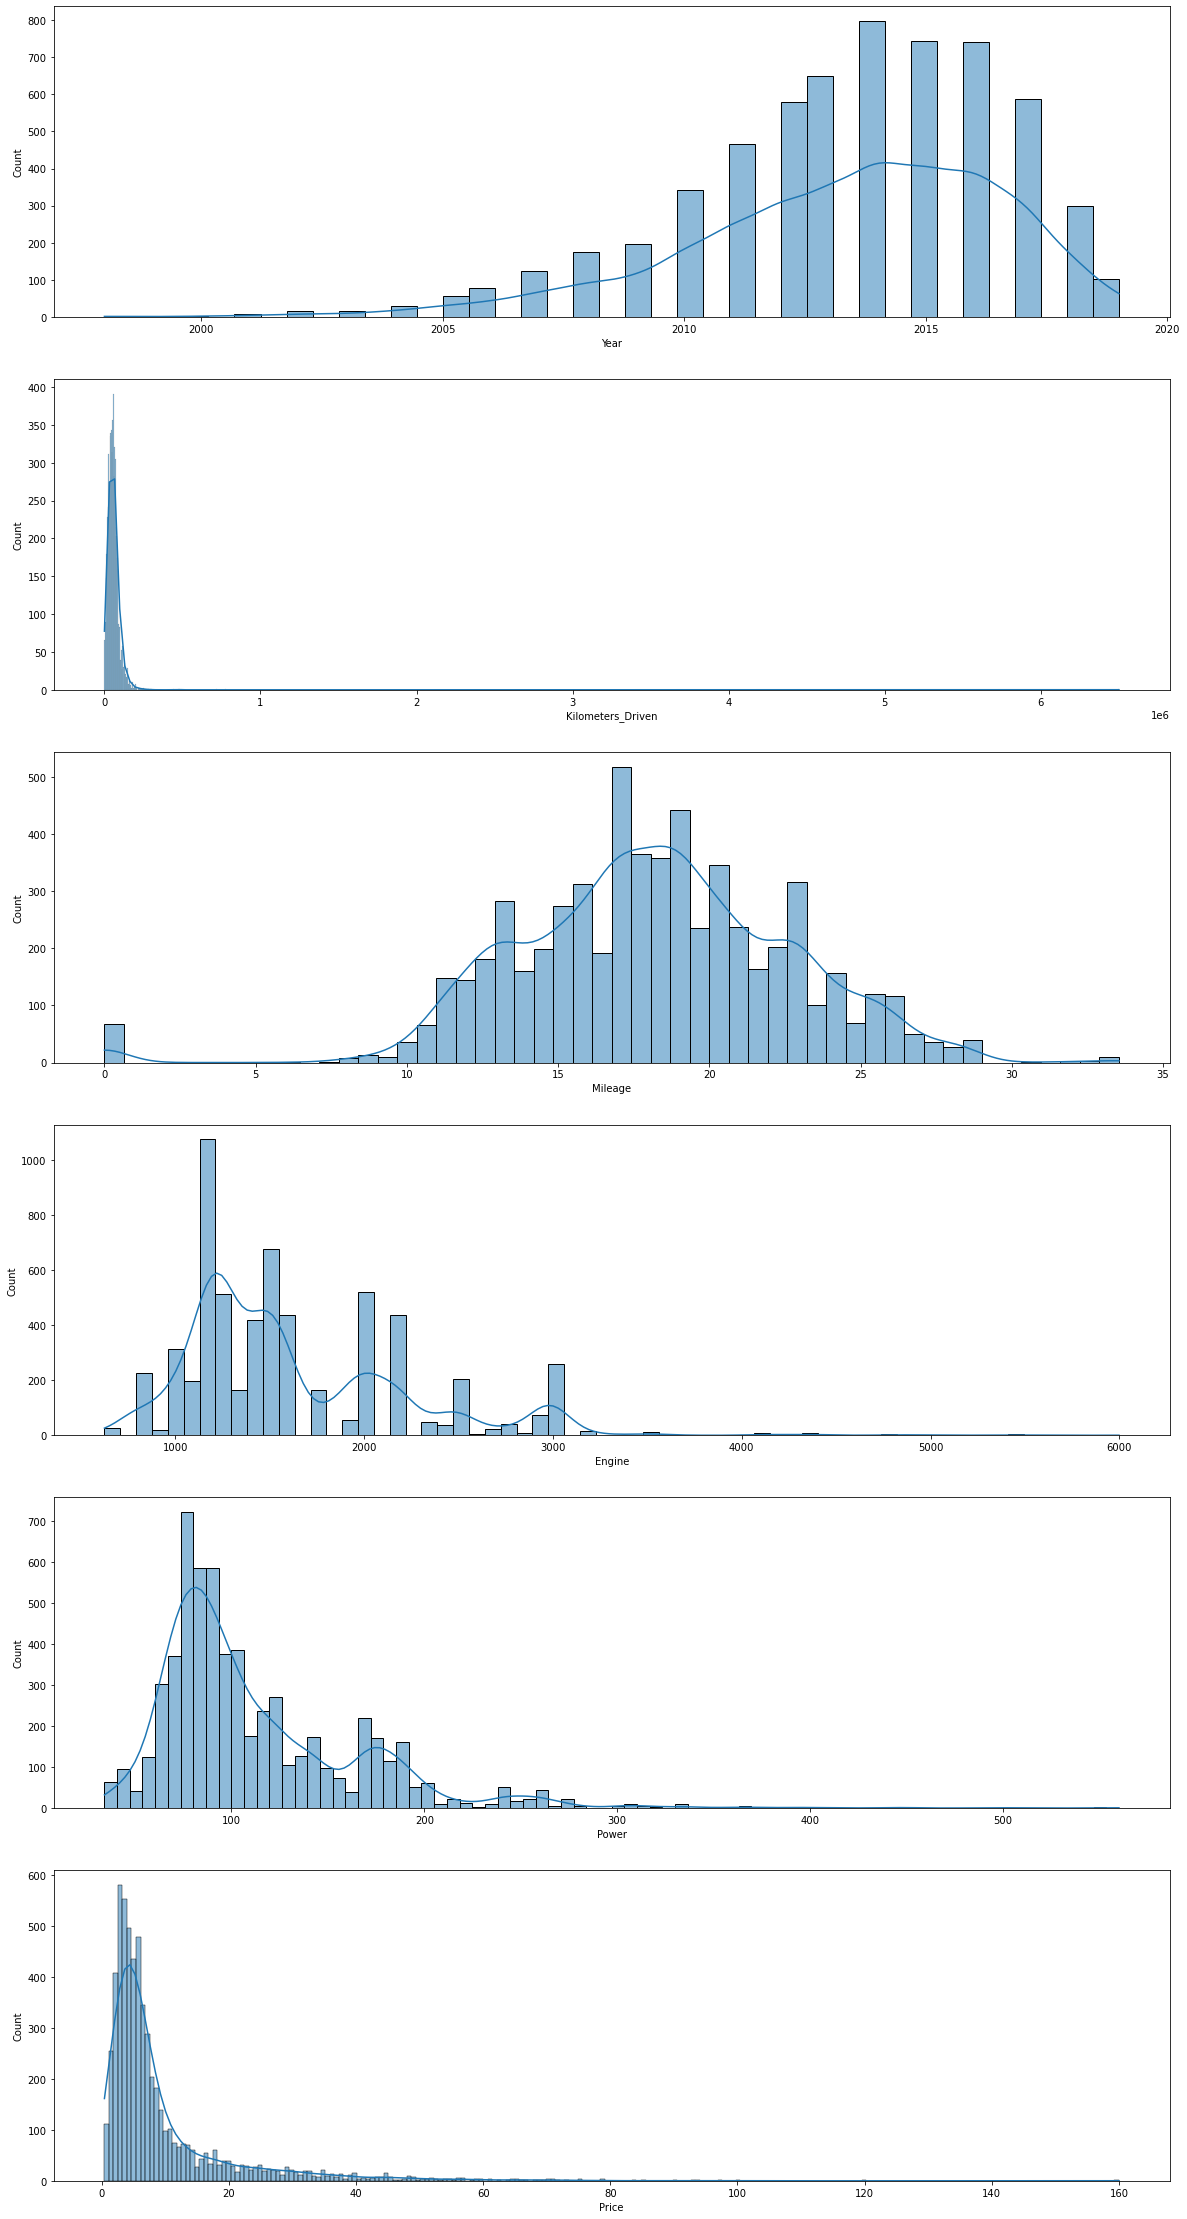

In [38]:
import matplotlib.pyplot as plt

columnsToScale = ["Year", "Kilometers_Driven", "Mileage", "Engine", "Power","Price"]
fig, ax = plt.subplots(len(columnsToScale), 1, figsize=(20,40))
for i in range(len(columnsToScale)):
    sns.histplot(data[columnsToScale[i]], ax=ax[i], kde = True)


In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minMaxScaler = MinMaxScaler()
zScaler = StandardScaler()

def ColumnScaler(data, columnName, scaler):
    return scaler.fit_transform(data[[columnName]])

#### Year

<AxesSubplot:xlabel='Year'>

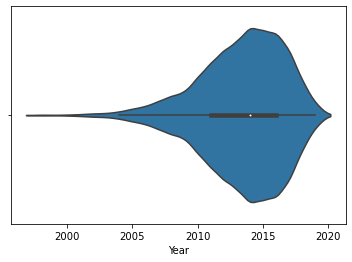

In [40]:
sns.violinplot(data=data, x="Year")

Кривая соответствует нормальному распределению с небольшим перекосом, поэтому применим MinMaxScaler

In [41]:
new_year = ColumnScaler(data, "Year", minMaxScaler)
data["Year"] = new_year

<AxesSubplot:xlabel='Year'>

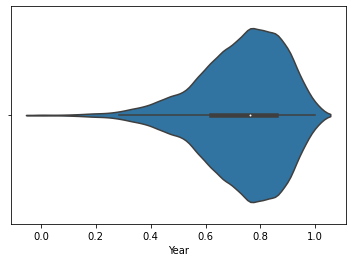

In [42]:
sns.violinplot(data=data, x="Year")

#### Kilometers_Driven

<AxesSubplot:xlabel='Kilometers_Driven'>

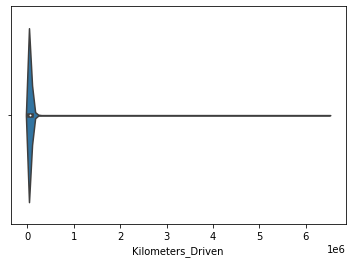

In [43]:
sns.violinplot(data=data, x="Kilometers_Driven", kde = True)

Видим длиннющий хвост, поэтому применим Z-оценку

In [44]:
new_kmDriven = ColumnScaler(data, "Kilometers_Driven", zScaler)
data["Kilometers_Driven"] = new_kmDriven

<AxesSubplot:xlabel='Kilometers_Driven'>

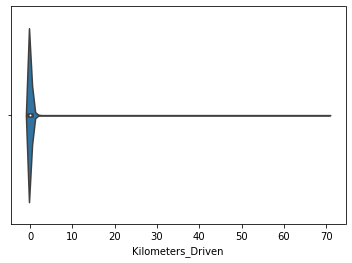

In [45]:
sns.violinplot(data=data, x="Kilometers_Driven", kde = True)

#### Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

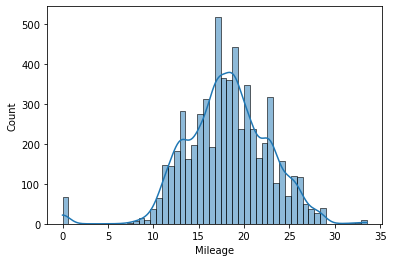

In [46]:
sns.histplot(data=data, x="Mileage", kde = True)

Видим небольшой перекос выборки на нулевых значениях, но в целом кривая соответствует нормальному распределению, поэтому применим MinMaxScaler

In [47]:
new_mileage = ColumnScaler(data, "Mileage", minMaxScaler)
data["Mileage"] = new_mileage

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

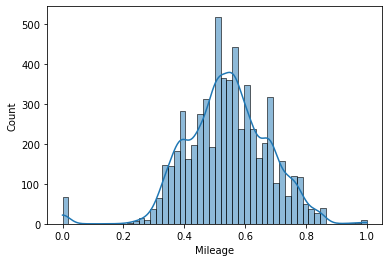

In [48]:
sns.histplot(data=data, x="Mileage", kde = True)

#### Engine

<AxesSubplot:xlabel='Engine', ylabel='Count'>

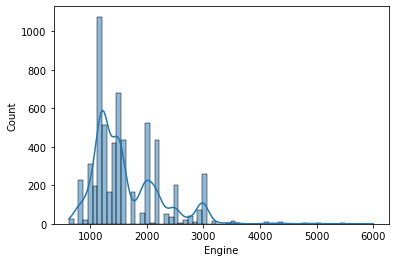

In [49]:
sns.histplot(data=data, x="Engine", kde = True)

In [50]:
new_engine = ColumnScaler(data, "Engine", zScaler)
data["Engine"] = new_engine

<AxesSubplot:xlabel='Engine', ylabel='Count'>

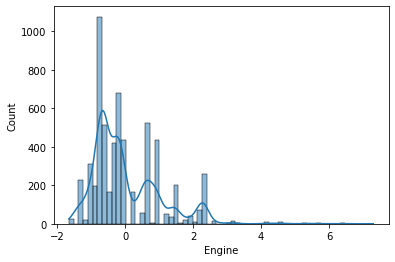

In [51]:
sns.histplot(data=data, x="Engine", kde = True)

#### Power

<AxesSubplot:xlabel='Power', ylabel='Count'>

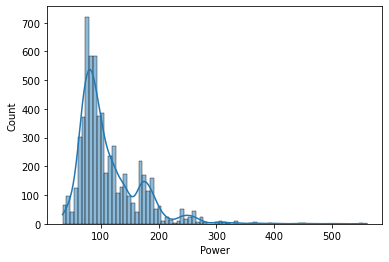

In [52]:
sns.histplot(data=data, x="Power", kde = True)

In [53]:
new_power = ColumnScaler(data, "Power", zScaler)
data["Power"] = new_power

<AxesSubplot:xlabel='Power', ylabel='Count'>

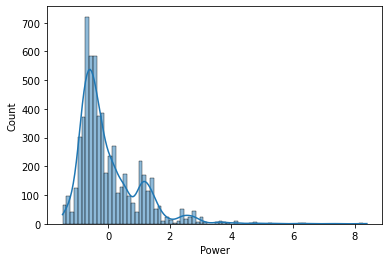

In [54]:
sns.histplot(data=data, x="Power", kde = True)

#### Seats

<AxesSubplot:xlabel='Seats', ylabel='Count'>

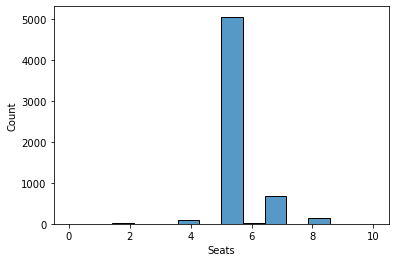

In [55]:
sns.histplot(data=data, x="Seats")

In [56]:
new_seats = ColumnScaler(data, "Seats", minMaxScaler)
data["Seats"] = new_seats

<AxesSubplot:xlabel='Seats', ylabel='Count'>

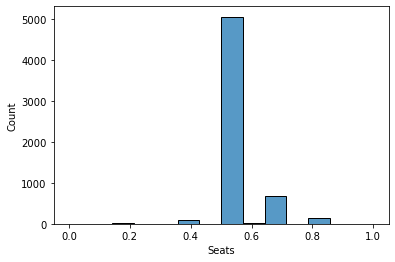

In [57]:
sns.histplot(data=data, x="Seats")

#### Price

<AxesSubplot:xlabel='Price', ylabel='Count'>

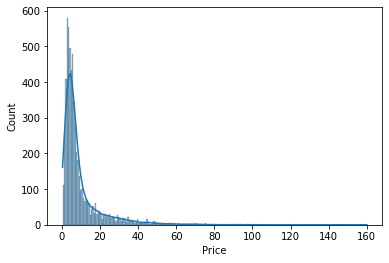

In [58]:
sns.histplot(data=data, x="Price", kde = True)

In [59]:
new_price = ColumnScaler(data, "Price", zScaler)
data["Price"] = new_price

<AxesSubplot:xlabel='Price', ylabel='Count'>

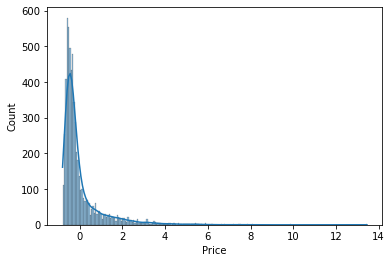

In [60]:
sns.histplot(data=data, x="Price", kde = True)

### Итоговый вид набора данных

In [61]:
data.head(30)


,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,0.571429,0.145248,1,0.793083,-1.039023,-1.027489,0.5,-0.690729,0,0,...,0,0,1,0,1,0,0,0,0,1
1,0.809524,-0.194380,1,0.586464,-0.064632,0.249596,0.5,0.270064,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0.619048,-0.139601,1,0.542636,-0.703659,-0.454264,0.5,-0.444945,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.666667,0.309585,1,0.619261,-0.621904,-0.453138,0.7,-0.310880,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.714286,-0.197996,2,0.453190,0.579401,0.523633,0.5,0.738395,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0.666667,0.178116,1,0.629100,-1.346023,-1.083047,0.5,-0.637103,0,0,...,0,0,0,0,0,0,1,0,0,1
6,0.714286,0.309574,1,0.688134,-0.266518,-0.934767,0.5,-0.534321,0,0,...,0,0,0,0,0,1,0,0,0,1
7,0.857143,-0.249159,1,0.338700,1.892493,1.099860,0.8,0.716945,0,0,...,0,0,1,0,0,1,0,0,1,0
8,0.714286,0.062313,1,0.612403,-0.037936,-0.174597,0.5,-0.382381,0,0,...,0,0,0,1,0,1,0,0,0,1
9,0.666667,0.078769,2,0.664878,-0.621904,-0.730178,0.5,-0.672854,0,0,...,0,0,0,0,0,1,0,0,0,1


In [62]:
data_scaled = data.copy()

# Лабораторная Работа №3

## "Подготовка обучающей и тестовой выборок. Кросс-валидация. Подбор гиперпараметров для метода kNN."

Что изменилось во второй работе:
1. Удалил две строки для электрических машин, как и планировал;
2. На момент демонстрации я не удалил столбец ID и не нормализовал его. Я про это благополучно забыл, из-за чего на масштабированных данных оптимальным числом соседей становились числа от 110 до 160, а к-т детерминации (R2) был меньше нуля. Посмотрим, как поведёт себя исправленная модель;

Поработаем над масштабированным и немасштабированным наборами данных из предыдущей работы.

In [63]:
# Функция вернёт обновлённый список колонок
def MoveColumnToEnd(data, column_name):
    columns = data.columns.tolist()
    column = columns.pop(columns.index(column_name))
    columns.append(column)
    return columns

# Переместим целевой признак в конец
new_columns = MoveColumnToEnd(data_unscaled, "Price")

# Поскольку колонки у обоих наборов одинаковые, результат будет общим.
data_unscaled = data_unscaled[new_columns]
data_scaled = data_scaled[new_columns]

<AxesSubplot:ylabel='Density'>

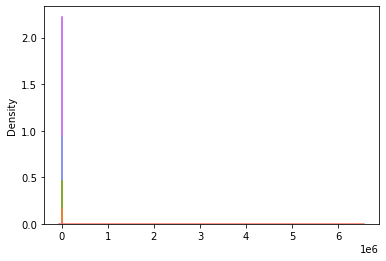

In [64]:
sns.kdeplot(data = data_unscaled, legend = False)

*до исправления ошибки в виде столбца ID на масштабированных д-х был идентичный график, разве что вместо e+6 было e+3*

<AxesSubplot:ylabel='Density'>

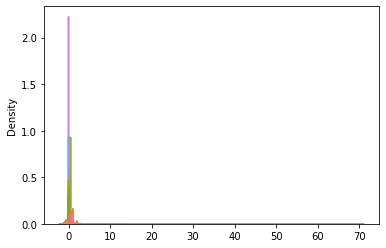

In [65]:
sns.kdeplot(data = data_scaled, legend = False)

### 1. Разделение набора данных

In [66]:
from sklearn.model_selection import train_test_split


# Для определённости будем всегда подставлять в random_state одно значение
RANDOM_STATE_GLOBAL = 16
# Указываем, где целевой признак, а где - набор данных
y_column = "Price"
x_columns = data_unscaled.columns.tolist()
x_columns.pop(x_columns.index(y_column))


data_unscaled_x_train, data_unscaled_x_test, data_unscaled_y_train, data_unscaled_y_test = train_test_split(data_unscaled[x_columns], 
                                                                                                            data_unscaled[y_column], 
                                                                                                            test_size = 0.8, 
                                                                                                            random_state = RANDOM_STATE_GLOBAL)

data_scaled_x_train, data_scaled_x_test, data_scaled_y_train, data_scaled_y_test = train_test_split(data_scaled[x_columns], 
                                                                                                            data_scaled[y_column], 
                                                                                                            test_size = 0.8, 
                                                                                                            random_state = RANDOM_STATE_GLOBAL)

### 2. Получение произвольной модели

In [67]:
from sklearn.neighbors import KNeighborsRegressor


random_param = 22

knn_unscaled = KNeighborsRegressor(n_neighbors = random_param)
knn_scaled = KNeighborsRegressor(n_neighbors = random_param)

knn_unscaled.fit(data_unscaled_x_train, data_unscaled_y_train)
knn_scaled.fit(data_scaled_x_train, data_scaled_y_train)

knn_unscaled_prediction = knn_unscaled.predict(data_unscaled_x_test)
knn_scaled_prediction = knn_scaled.predict(data_scaled_x_test)

Получили модель, теперь - оценка качества:

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import ShuffleSplit, cross_val_score, cross_validate


def PrintRegressionMetrics(y_test, y_predicted):
    return "-Средняя абсолютная ошибка = {0};\
          \n-Медианная абсолютная ошибка = {1};\
          \n-Среднеквадратичная ошибка = {2};\
          \n-Коэффициент детерминации = {3}.".format(mean_absolute_error(y_test, y_predicted),
                                                        median_absolute_error(y_test, y_predicted),
                                                        mean_squared_error(y_test, y_predicted, squared = False),
                                                        r2_score(y_test, y_predicted)) 

In [69]:
random_model_unscaled_data_results = PrintRegressionMetrics(data_unscaled_y_test, knn_unscaled_prediction)
print("Для немасштабированных данных:\n" + random_model_unscaled_data_results)

Для немасштабированных данных:
-Средняя абсолютная ошибка = 5.4108360086112475;          
-Медианная абсолютная ошибка = 3.1079545454545463;          
-Среднеквадратичная ошибка = 9.720584012504426;          
-Коэффициент детерминации = 0.24164131017945278.


In [70]:
random_model_scaled_data_results = PrintRegressionMetrics(data_scaled_y_test, knn_scaled_prediction)
print("Для масштабированных данных:\n" + random_model_scaled_data_results)

Для масштабированных данных:
-Средняя абсолютная ошибка = 0.2788384178937498;          
-Медианная абсолютная ошибка = 0.13642040783353254;          
-Среднеквадратичная ошибка = 0.5245404461146183;          
-Коэффициент детерминации = 0.7235572218632615.


Проведём кросс-валидацию и посмотрим, насколько одно случайное разбиение соответствует среднему показателю:

In [71]:
def PrintDictionary(dict):
    for key, value in dict.items():
        print("\n{0} -> {1}".format(key, value))


scoring_strategies = ["neg_root_mean_squared_error", "r2"] 

# Кросс-валидация по стратегии ShuffleSplit
data_unscaled_cv_scores = cross_validate(KNeighborsRegressor(n_neighbors = random_param), data_unscaled[x_columns], data_unscaled[y_column], scoring = scoring_strategies, cv = ShuffleSplit(n_splits = 8, test_size = 0.8, random_state = RANDOM_STATE_GLOBAL))
data_scaled_cv_scores = cross_validate(KNeighborsRegressor(n_neighbors = random_param), data_scaled[x_columns], data_scaled[y_column], scoring = scoring_strategies, cv = ShuffleSplit(n_splits = 8, test_size = 0.8, random_state = RANDOM_STATE_GLOBAL))

print("Кросс-валидация для немасштабированных данных:")
PrintDictionary(data_unscaled_cv_scores)
print("\n\nКросс-валидация для масштабированных данных:")
PrintDictionary(data_scaled_cv_scores)

Кросс-валидация для немасштабированных данных:

fit_time -> [0.01599717 0.01499629 0.01499581 0.01399708 0.01399803 0.01399708
 0.01499724 0.01499701]

score_time -> [0.06098843 0.06198907 0.05798936 0.05798936 0.05898762 0.0579896
 0.0579896  0.05798841]

test_neg_root_mean_squared_error -> [ -9.72058401 -10.03781859  -9.63748914  -9.66133394  -9.85531
  -9.49133028  -9.55642826  -9.84120328]

test_r2 -> [0.24164131 0.23014713 0.25633304 0.25878841 0.22987474 0.27061136
 0.26106281 0.24382612]


Кросс-валидация для масштабированных данных:

fit_time -> [0.01399684 0.01499701 0.01499629 0.01499605 0.01399732 0.01399732
 0.01399708 0.01399732]

score_time -> [0.29394341 0.32693887 0.31893992 0.2979424  0.29394341 0.27794695
 0.27794719 0.28294587]

test_neg_root_mean_squared_error -> [-0.52454045 -0.5679027  -0.54367736 -0.54377808 -0.53673244 -0.53171855
 -0.54593    -0.55029173]

test_r2 -> [0.72355722 0.69151486 0.70372806 0.7060532  0.71404756 0.71343326
 0.6981108  0.70401577]


Масштабированные данные имеют отрицательный показатель к-та детерминации, что говорит об их ужасной обобщающей способности. При этом среднеквадратичная ошибка низка, что может свидетельствовать либо о переобучении, либо о неспособности модели обобщить такие данные в принципе.

Что есть высокая и низкая ошибки? Смотрим на графики распределения целевого признака из второй лабораторной: на немасштабированных данных значения распределны примерно от 0 до 160, то есть ошибка равняется где-то 6% длины интервала, а на масштабированных - значения примерно от -1 до 13.5, то есть ошибка - где-то 7 или 8 процентов.

Также стоит заметить, что немасштабированные данные имеют существенно больший коэффициент детерминации.

### 3. Получение оптимальной модели
#### Немасштабированные данные

Теперь найдём оптимальное значение K, используя решётчатый поиск.

In [72]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

# Перебирал так много из-за проблем с подбором на масштабированных данных
tested_parametres = {"n_neighbors" : np.array(range(1, 41, 3))}

In [73]:
%%time
# Кросс-валидация по стратегии KFold
randomized_grid_search = RandomizedSearchCV(KNeighborsRegressor(), 
                                            tested_parametres, 
                                            n_iter = 7, 
                                            random_state = RANDOM_STATE_GLOBAL, 
                                            cv = KFold(shuffle = True, random_state = RANDOM_STATE_GLOBAL), 
                                            scoring = "neg_root_mean_squared_error")

randomized_grid_search.fit(data_unscaled[x_columns], data_unscaled[y_column])

Wall time: 2.79 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=16, shuffle=True),
                   estimator=KNeighborsRegressor(), n_iter=7,
                   param_distributions={'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40])},
                   random_state=16, scoring='neg_root_mean_squared_error')

In [74]:
# Найденное значение:
randomized_best_param = randomized_grid_search.best_params_.get("n_neighbors")
print(randomized_best_param, randomized_grid_search.best_score_)

7 -7.446886385306317


Попробуем найти оптимальное решение вокруг найденного наилучшего параметра:

In [75]:
# Ищем решение вокруг полученного значения с радиусом 10
# Тоже перебираю так много из-за проблем с масштабированными данными
gs_parametres = {"n_neighbors" : np.array(range(randomized_best_param - 3, randomized_best_param + 4))}

# Прогоняем все решения в окрестности
grid_search = GridSearchCV(KNeighborsRegressor(), gs_parametres, scoring = "neg_root_mean_squared_error", cv = KFold(shuffle = True, random_state = RANDOM_STATE_GLOBAL))
# Обучаем оптимальную модель
grid_search.fit(data_unscaled[x_columns], data_unscaled[y_column])

GridSearchCV(cv=KFold(n_splits=5, random_state=16, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 4,  5,  6,  7,  8,  9, 10])},
             scoring='neg_root_mean_squared_error')

In [76]:
# Итоговые "наилучшие" параметр и показатель RMSE:
best_param = grid_search.best_params_.get("n_neighbors")
print(best_param, grid_search.best_score_)

5 -7.396568464228198


Обучим оптимальную модель:

In [77]:
cv_found_knn_unscaled = KNeighborsRegressor(n_neighbors = best_param)
cv_found_knn_unscaled.fit(data_unscaled_x_train, data_unscaled_y_train)
cv_found_knn_unscaled_prediction = cv_found_knn_unscaled.predict(data_unscaled_x_test)

found_model_unscaled_data_results = PrintRegressionMetrics(data_unscaled_y_test, cv_found_knn_unscaled_prediction)

Сравним результаты:

In [78]:
print("Случайная модель:\n-K = {0};\n{1}\n\nОптимальная модель:\n-K = {2};\n{3}".format(random_param, random_model_unscaled_data_results, best_param, found_model_unscaled_data_results))

Случайная модель:
-K = 22;
-Средняя абсолютная ошибка = 5.4108360086112475;          
-Медианная абсолютная ошибка = 3.1079545454545463;          
-Среднеквадратичная ошибка = 9.720584012504426;          
-Коэффициент детерминации = 0.24164131017945278.

Оптимальная модель:
-K = 5;
-Средняя абсолютная ошибка = 4.754752804320732;          
-Медианная абсолютная ошибка = 2.302;          
-Среднеквадратичная ошибка = 8.684876941069014;          
-Коэффициент детерминации = 0.3946350255561992.


Видим существенный выигрыш от решётчатого поиска: все параметры существенно "прибавили", в особенности - R2.

#### Масштабированные данные
Проделаем то же самое:

In [89]:
# Точно также прогоняем: тот же диапазон возможных значений K, тот же ключ генератора случ. чисел, 
#                        та же стратегия кросс-валидации, та же метрика.
randomized_grid_search = RandomizedSearchCV(KNeighborsRegressor(), 
                                            tested_parametres, 
                                            n_iter = 7, 
                                            random_state = RANDOM_STATE_GLOBAL, 
                                            cv = KFold(shuffle = True, random_state = RANDOM_STATE_GLOBAL), 
                                            scoring = "neg_root_mean_squared_error")
# Теперь работаем с масштабированными данными
randomized_grid_search.fit(data_scaled[x_columns], data_scaled[y_column])

# Найденное рабочее значение
randomized_best_param = randomized_grid_search.best_params_.get("n_neighbors")
print(randomized_best_param, randomized_grid_search.best_score_)

# Ищем оптимальное
gs_parametres = {"n_neighbors" : np.array(range(randomized_best_param - 3, randomized_best_param + 4))}
grid_search = GridSearchCV(KNeighborsRegressor(), gs_parametres, scoring = "neg_root_mean_squared_error", cv = KFold(shuffle = True, random_state = RANDOM_STATE_GLOBAL))
grid_search.fit(data_scaled[x_columns], data_scaled[y_column])

# Найденное оптимальное значение
best_param = grid_search.best_params_.get("n_neighbors")
print(best_param, grid_search.best_score_)

# Обучаем оптимальную модель
cv_found_knn_scaled = KNeighborsRegressor(n_neighbors = best_param)
cv_found_knn_scaled.fit(data_scaled_x_train, data_scaled_y_train)
cv_found_knn_scaled_prediction = cv_found_knn_scaled.predict(data_scaled_x_test)

# Смотрим на результат
found_model_scaled_data_results = PrintRegressionMetrics(data_scaled_y_test, cv_found_knn_scaled_prediction)

7 -0.5014027799466024
6 -0.49959869739819834


In [90]:
print("Случайная модель:\n-K = {0};\n{1}\n\nОптимальная модель:\n-K = {2};\n{3}".format(random_param, random_model_scaled_data_results, best_param, found_model_scaled_data_results))

Случайная модель:
-K = 22;
-Средняя абсолютная ошибка = 0.2788384178937498;          
-Медианная абсолютная ошибка = 0.13642040783353254;          
-Среднеквадратичная ошибка = 0.5245404461146183;          
-Коэффициент детерминации = 0.7235572218632615.

Оптимальная модель:
-K = 6;
-Средняя абсолютная ошибка = 0.2854839407659935;          
-Медианная абсолютная ошибка = 0.12423275972452132;          
-Среднеквадратичная ошибка = 0.561599142443407;          
-Коэффициент детерминации = 0.6831161118747986.


Здесь получили ухудшение от решётчатого поиска. Явление объяснить тяжело; возможно, слишком хорошо попали изначальной точкой.

Так или иначе, преимущество обучения на масштабированных данных крайне заметно!